<a href="https://colab.research.google.com/github/navrgithub/NLP_Authorship_Attribution/blob/main/CNN_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP group project/data')

In [ ]:
import csv
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [ ]:
import pandas as pd
df_nw= pd.read_csv("final_task2_data.csv")
print(df_nw)

       Unnamed: 0                                               text  label
0               0  CMV: Fat Acceptance Tik Tokers and influencers...      0
1               1  CMV: It makes sense to compare apples and oranges      0
2               2  CMV: Dismissing an individual's experience bec...      0
3               3  CMV: If pro-anorexia groups, suicide promotion...      0
4               4  CMV: Asian Americans generally prospering in t...      0
...           ...                                                ...    ...
12336        1061  how much of your body is your own? if i'm not ...      1
12337        1062  how do you keep a space station clean? the ast...      1
12338        1063  the city where you pay a year's rent up front,...      1
12339        1064  the bbc app gives you the best of bbc wherever...      1
12340        1065  learn how the bbc is working to strengthen tru...      1

[12341 rows x 3 columns]


In [ ]:
df = df_nw

In [ ]:

df_nw['text'].fillna('', inplace=True)

import pandas as pd

# Create a DataFrame
# Rename column 'B' to 'new_name'
df = df.rename(columns={'Generation': 'text'})

print(df)



       Unnamed: 0                                               text  label
0               0  CMV: Fat Acceptance Tik Tokers and influencers...      0
1               1  CMV: It makes sense to compare apples and oranges      0
2               2  CMV: Dismissing an individual's experience bec...      0
3               3  CMV: If pro-anorexia groups, suicide promotion...      0
4               4  CMV: Asian Americans generally prospering in t...      0
...           ...                                                ...    ...
12336        1061  how much of your body is your own? if i'm not ...      1
12337        1062  how do you keep a space station clean? the ast...      1
12338        1063  the city where you pay a year's rent up front,...      1
12339        1064  the bbc app gives you the best of bbc wherever...      1
12340        1065  learn how the bbc is working to strengthen tru...      1

[12341 rows x 3 columns]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# create a sample dataframe
# data = {'id': [1, 2, 3],
#         'text': ['This is the first paragraph', 'This is the second paragraph', 'This is the third paragraph']}
# df = pd.DataFrame(data)

# initialize the CountVectorizer object
cv = CountVectorizer()

# fit and transform the text data
text_counts = cv.fit_transform(df_nw['text'])

# convert the text_counts to a pandas dataframe



In [ ]:
result = df_nw

In [ ]:
result['y'], _ = pd.factorize(result['label'])

In [ ]:
result.drop('label', axis=1, inplace=True)

In [ ]:
# Step 1: Preprocess the text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_dataframe(df, column):
    df[column] = df[column].str.lower() # convert text to lowercase
    df[column] = df[column].str.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
    stop_words = set(stopwords.words("english")) # get list of stop words
    lemmatizer = WordNetLemmatizer() # initialize lemmatizer
    return df


df = preprocess_dataframe(result, "text")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,Unnamed: 0,text,y
0,0,cmv fat acceptance tik tokers and influencers ...,0
1,1,cmv it makes sense to compare apples and oranges,0
2,2,cmv dismissing an individuals experience becau...,0
3,3,cmv if proanorexia groups suicide promotion gr...,0
4,4,cmv asian americans generally prospering in th...,0
...,...,...,...
12336,1061,how much of your body is your own if im not go...,1
12337,1062,how do you keep a space station clean the astr...,1
12338,1063,the city where you pay a years rent up front a...,1
12339,1064,the bbc app gives you the best of bbc wherever...,1


In [ ]:
# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
df=df.dropna()
X = df['text'] # text data

y = df['y'] # label data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Step 3: Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)




In [ ]:
X_test_vectorized

<2469x85134 sparse matrix of type '<class 'numpy.float64'>'
	with 510751 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vectorized)

  (0, 59557)	0.2133788004329471
  (0, 52986)	0.06975745007330422
  (0, 12563)	0.05564372634899644
  (0, 83203)	0.0771352249307092
  (0, 74837)	0.06748496971838919
  (0, 67583)	0.28241957653107574
  (0, 81865)	0.07270850102671372
  (0, 39140)	0.06647841196223853
  (0, 69719)	0.06937380624015078
  (0, 55870)	0.07162537646896065
  (0, 55778)	0.0746950152854296
  (0, 26439)	0.10303490008607225
  (0, 36214)	0.09755297762995224
  (0, 9189)	0.043217509534649846
  (0, 63696)	0.17925478932891192
  (0, 67846)	0.16099963819358398
  (0, 19621)	0.156271582081809
  (0, 54507)	0.04525456544132882
  (0, 67354)	0.14373975976647713
  (0, 72020)	0.1550074983273971
  (0, 35783)	0.05874669808656833
  (0, 74966)	0.1333839341587356
  (0, 12663)	0.07725918945995375
  (0, 76917)	0.5401874626109704
  (0, 9187)	0.4398621440998256
  :	:
  (9871, 41364)	0.038724906190101764
  (9871, 82296)	0.00879287030539804
  (9871, 15773)	0.01582562916599719
  (9871, 79376)	0.016423196746336275
  (9871, 39623)	0.130978606480194

In [ ]:
X_train_vectorized

<9872x85134 sparse matrix of type '<class 'numpy.float64'>'
	with 2141264 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion_mat)



Accuracy: 0.901174564601053
Precision: 0.9054010130856902
Recall: 0.6374706921379065
F1-score: 0.6865760163819798
Confusion matrix:
 [[  91  235]
 [   9 2134]]


DEEp Learning model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df['text'].values # text data

y = df['y'].values # label data
X = vectorizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.toarray())
X_test_tensor = torch.Tensor(X_test.toarray())
y_train_tensor = torch.Tensor(y_train).long()
y_test_tensor = torch.Tensor(y_test).long()


In [ ]:

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



In [ ]:
X_train_tensor.shape[1]

96592

In [ ]:
# # Define model architecture


# Define model architecture
class TextClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 512)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(512,256)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc5 = nn.Linear(64,32)
        self.fc6 = nn.Linear(32,16)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(16, num_classes)
        self.Softmax = nn.Softmax(dim=1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        # x = self.dropout(x)
        x = self.fc3(x)
        x = self.fc4(x)
        # x = self.dropout(x)
        x = self.fc5(x)
        x = self.fc6(x)
        # x = self.dropout(x)
        x = self.fc7(x)
        x= self.Softmax(x)
        return x


In [ ]:
# Create model, loss function, and optimizer
model = TextClassifier(num_classes=10)
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_function = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [ ]:
epochs = 5
l1=[]
l2=[]
running_lossy = 0.
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = model.forward(inputs) 
    loss = loss_function(predictions.squeeze(), outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
  l1.append(running_loss / len(train_loader))
  
  running_loss = 0.
  with torch.no_grad():
    for data in test_loader:
      inputs, outputs = data
      predictions = model.forward(inputs)
      loss = loss_function(predictions.squeeze(), outputs)
      running_loss += loss.item()
      val_loss = running_loss / len(test_loader)
  l2.append(val_loss)

  print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch: 1, Train Loss: 2.2853, Val Loss: 2.2478
Epoch: 2, Train Loss: 2.0625, Val Loss: 1.6909
Epoch: 3, Train Loss: 1.6189, Val Loss: 1.5992
Epoch: 4, Train Loss: 1.5974, Val Loss: 1.5948
Epoch: 5, Train Loss: 1.5951, Val Loss: 1.5935


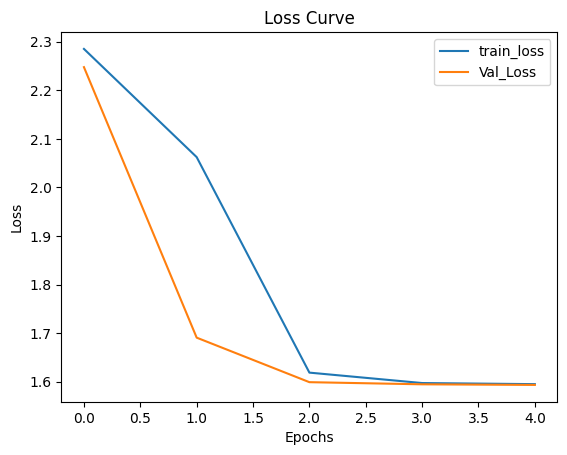

In [ ]:

import matplotlib.pyplot as plt

plt.plot(np.arange(epochs),l1 , label = "train_loss")
plt.plot(np.arange(epochs),l2 , label = "Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
predictions = []
with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    model = model.to(device)
    output = model(inputs)
    _, pred = torch.max(output.data, 1)
    predictions.extend(pred.cpu().numpy().tolist())
test_accuracy = accuracy_score(y_test.flatten(), predictions)

In [ ]:
test_accuracy

0.8679627379505873

In [ ]:
batch_size = 32
num_sample = len(y_test) / 9
num_samples = len(y_test) 
num_batches = num_samples // batch_size
correct_predictions = 0

with torch.no_grad():
    for i in range(num_batches):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size
        X_batch = torch.tensor(X_test[batch_start:batch_end].toarray(), dtype=torch.float32).to(device)
        y_batch = torch.tensor(y_test[batch_start:batch_end]).to(device)
        predictions = model(X_batch)
        # Get the index of the predicted class with the highest probability
        _, predicted = torch.max(predictions, 1)
        # Count the number of correct predictions in this batch
        correct_predictions += (predicted == y_batch).sum().item()

# Calculate the overall accuracy
accuracy = 100 * correct_predictions / num_samples
print('Testing Accuracy: {:.5f}%'.format(accuracy))


Testing Accuracy: 86.63426%


In [ ]:
test_accuracy

0.8679627379505873

In [ ]:
predictions = []
tz=[]
# with torch.no_grad():
for inputs, labels in test_loader:
  inputs, labels = inputs.to(device), labels.to(device)
  model = model.to(device)
  output = model(inputs)
  _, pred = torch.max(output.data, 1)
  predictions.extend(pred.cpu().numpy().tolist())
predictions = np.array(predictions)
tz.append(accuracy_score(y_test.flatten(), predictions))


In [ ]:
set(predictions)

{1}